# **PREDICTION WHETHER THE STOCK MARKERT WILL MOVE UP OR DOWN THE FOLLOWING DAY**

**A hedge fund that trades on markets all over the world seeks a model they can add to their trading arsenal. Specifically, they want a model that will help them decide when to open and close their long term swing trades i.e trades that span between a few days to years. By taking in information as it comes in daily, the model should be able to analyse market sentiment and predict market movement the following day - Bullish or Bearish.**

****
****
**Here is the process:**
*    Importing libraries and loading data
*    Understanding the data
*    Feature engineering and cleaning
*    Modeling





# 1. Import Relevant Libraries


In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np

# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library to download data from yahoo finance
import yfinance as yf

# 2. Load The Data

In [ ]:
# load the data snp500 stock from 2010 to end 2020
df = yf.download('^GSPC', start='2010-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# preview the data
df.head(3)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2000-01-03,1455.219971,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1402.109985,1413.270020,1377.680054,1399.420044,1085500000


In [ ]:
# data shape
df.shape

(6037, 6)

In [ ]:
# check for dtypes
df.dtypes

,,0
Price,Ticker,
Adj Close,^GSPC,float64
Close,^GSPC,float64
High,^GSPC,float64
Low,^GSPC,float64
Open,^GSPC,float64
Volume,^GSPC,int64


In [ ]:
# check for statistical summary
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
count,6037.000000,6037.000000,6037.000000,6037.000000,6037.000000,6.037000e+03
mean,1973.586551,1973.586551,1984.955333,1960.794329,1973.302234,3.327312e+09
std,1061.335875,1061.335875,1066.402460,1055.531844,1061.063967,1.509315e+09
min,676.530029,676.530029,695.270020,666.789978,679.280029,3.560700e+08
25%,1191.380005,1191.380005,1198.739990,1184.359985,1191.369995,2.093720e+09
50%,1457.339966,1457.339966,1465.709961,1448.359985,1457.150024,3.442920e+09
75%,2584.840088,2584.840088,2596.270020,2572.149902,2581.929932,4.159760e+09
max,4796.560059,4796.560059,4818.620117,4780.979980,4804.509766,1.145623e+10


# 3. Feature Engineering & Cleaning

In [ ]:
# get percentage change of close price
df['today'] =  df['Adj Close'].pct_change() * 100

In [ ]:
# for loop to create columns for the last 5 days volumes
for i in range(1,6):
  df['lag_'+str(i)] = df['today'].shift(i)

In [ ]:
# new column of adjusted volume which is actual volume shifted by 1
df['Adj Volume(e+09)']= df['Volume'].shift(1).values/1000000000

In [ ]:
# check for null values
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,^GSPC,0
Close,^GSPC,0
High,^GSPC,0
Low,^GSPC,0
Open,^GSPC,0
Volume,^GSPC,0
today,,1
lag_1,,2
lag_2,,3


In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
# new direction column
df['Direction'] = [1 if i > 0 else 0 for i in df['today']]

In [ ]:
# preview data
df.head(3)

Price,Adj Close,Close,High,Low,Open,Volume,today,lag_1,lag_2,lag_3,lag_4,lag_5,Adj Volume(e+09),Direction
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,,
Date,,,,,,,,,,,,,,
2000-01-11,1438.560059,1438.560059,1458.660034,1434.420044,1457.599976,1014000000,-1.306251,1.118997,2.709040,0.095568,0.192218,-3.834467,1.0648,0
2000-01-12,1432.250000,1432.250000,1442.599976,1427.079956,1438.560059,974600000,-0.438637,-1.306251,1.118997,2.709040,0.095568,0.192218,1.0140,0
2000-01-13,1449.680054,1449.680054,1454.199951,1432.250000,1432.250000,1030400000,1.216970,-0.438637,-1.306251,1.118997,2.709040,0.095568,0.9746,1


In [ ]:
# drop columns
df.drop(['Volume','Close','Low','High', 'Open'],axis=1, inplace=True)

In [ ]:
# preview the dataframe before modeling
df.head(3)

Price,Adj Close,today,lag_1,lag_2,lag_3,lag_4,lag_5,Adj Volume(e+09),Direction
Ticker,^GSPC,,,,,,,,
Date,,,,,,,,,
2000-01-11,1438.560059,-1.306251,1.118997,2.709040,0.095568,0.192218,-3.834467,1.0648,0
2000-01-12,1432.250000,-0.438637,-1.306251,1.118997,2.709040,0.095568,0.192218,1.0140,0
2000-01-13,1449.680054,1.216970,-0.438637,-1.306251,1.118997,2.709040,0.095568,0.9746,1


# 4. Univariate & Multivariate Analysis

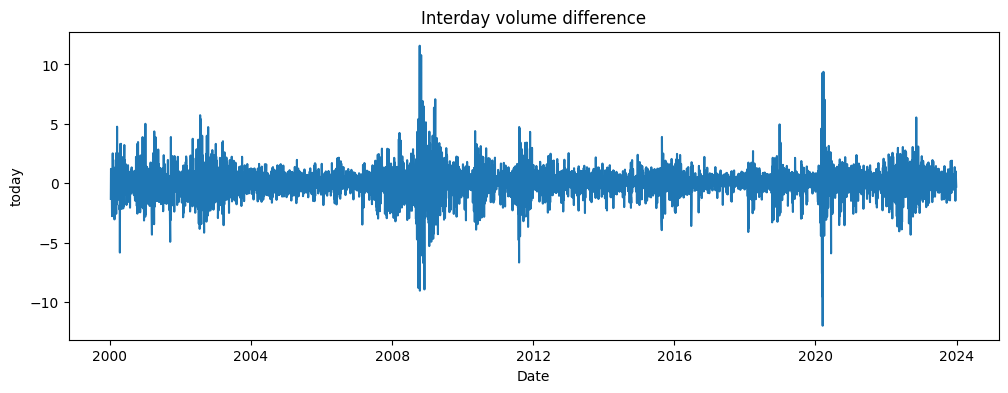

In [209]:
# visualize the today feature
plt.figure(figsize=(12,4))
sns.lineplot(x='Date',y='today', data=df)
plt.title('Interday volume difference')
plt.show()

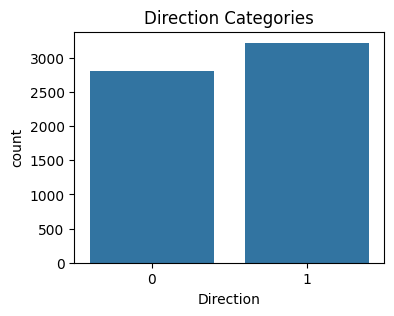

In [201]:
# visualize our target variable
plt.figure(figsize=(4,3))
sns.countplot(x='Direction', data=df)
plt.title('Direction Categories')
plt.show()

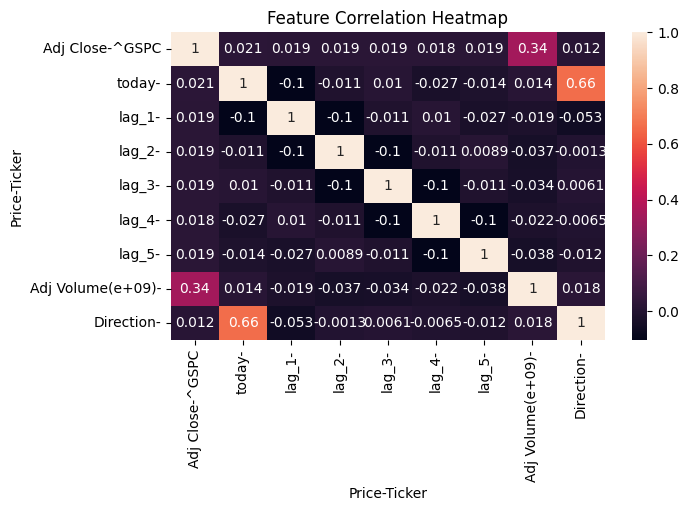

In [210]:
# visualize heatmap
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# 5. Modelling

In [156]:
# define inputs and outputs
x = df.drop(['Direction','today'], axis=1) #features
y = df['Direction'] #target

In [157]:
# import modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score


# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# 5.1 Logistic Regression Model

In [158]:
# create logistic regression model
lreg = LogisticRegression()

# fitting the model
lreg.fit(x_train, y_train)

# make predictions on the testing set
y_pred = lreg.predict(x_test)

In [170]:
# check model's accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test,y_pred)
print('F1 Score', f1)
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score:', roc_auc)
precision = precision_score(y_test,y_pred)
print('Precision Score', precision)
recall = recall_score(y_test,y_pred)
print('recall score:', recall)
print(cm)

Accuracy: 0.536039768019884
F1 Score 0.6864501679731243
ROC AUC Score: 0.5061270589014044
Precision Score 0.5367775831873906
recall score: 0.9518633540372671
[[ 34 529]
 [ 31 613]]


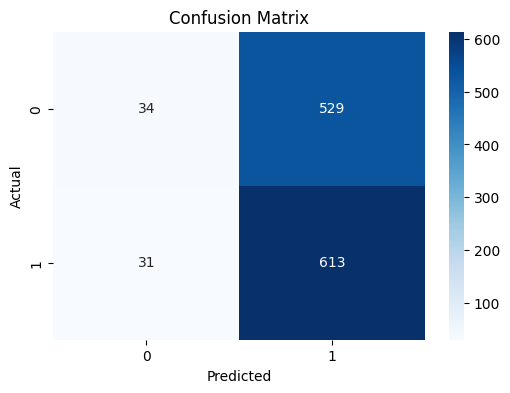

In [160]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix for logistic regression model
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5.2 Decision Tree

In [161]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create decision tree model
dtree = DecisionTreeClassifier()

# fit model'
dtree.fit(x_train, y_train)

# predict with the x_test
y_pred_tree = dtree.predict(x_test)

In [162]:
# check model's accuracy score
accuracy = accuracy_score(y_test, y_pred_tree)
print('Accuracy:', accuracy)
f1 = f1_score(y_test,y_pred_tree)
print('F1 Score', f1)
roc_auc = roc_auc_score(y_test, y_pred_tree)
print('ROC AUC Score:', roc_auc)
precision = precision_score(y_test,y_pred_tree)
print('Precision Score', precision)
recall = recall_score(y_test,y_pred_tree)
print('recall score:', recall)

Accuracy: 0.48384424192212094
F1 Score 0.5218726016884113
ROC AUC Score: 0.4806714252617411
Precision Score 0.5159332321699545
recall score: 0.5279503105590062


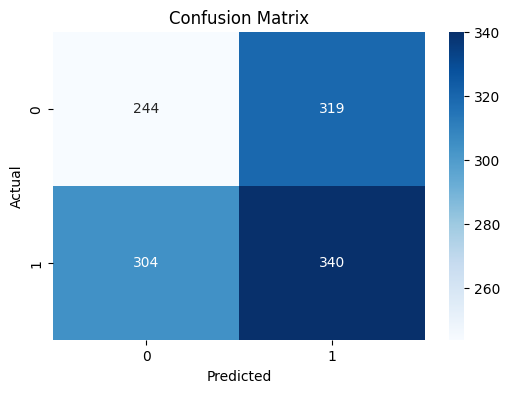

In [184]:
# create confusion matrix
cmtree = confusion_matrix(y_test, y_pred_tree)

# visualize confusion matrix for decision tree
plt.figure(figsize=(6,4))
sns.heatmap(cmtree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**The logistic regression model performed better than the decision trees thus we advance to optimize the logistic regression model.**

**However Decision tree model seemed to perform better on the negative cases thus a combination of the two if possible could likely give better performance.**

# 6. Model Optimization

## 6.1. Logistic Regression Model Hyperparameter Tuning


In [176]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# fit the gridsearchcv object to the data
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.5385588975125234


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [177]:
# use the optimized model for predictions
best_model = grid_search.best_estimator_
y_pred_new = best_model.predict(x_test)

Accuracy: 0.5343827671913836
F1 Score: 0.6849775784753364
ROC_AUC_Score: 0.5045742638703485
Precision Score 0.5359649122807018
Recall score: 0.9487577639751553


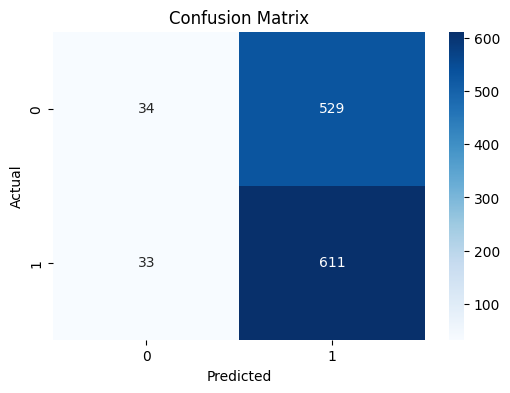

In [191]:
# evaluate optimized model
print('Accuracy:',accuracy_score(y_test, y_pred_new))
print( 'F1 Score:', f1_score(y_test,y_pred_new))
print( 'ROC_AUC_Score:',roc_auc_score(y_test, y_pred_new))
print( 'Precision Score',precision_score(y_test,y_pred_new))
print('Recall score:',recall_score(y_test,y_pred_new))

# create confusion matrix
cmhyp = confusion_matrix(y_test, y_pred_new)

# visualize confusion matrix for decision tree
plt.figure(figsize=(6,4))
sns.heatmap(cmhyp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6.2. Decision Tree Model Hyperparameter Tuning

In [190]:


# Define the parameter grid
param_grid_new = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search_new = GridSearchCV(clf, param_grid_new, cv=5)

# Fit the GridSearchCV object to the data
grid_search_new.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search_new.best_params_)
print("Best score:", grid_search_new.best_score_)

# Use the best model to make predictions
best_model_new= grid_search_new.best_estimator_
y_pred_tree_new = best_model_new.predict(x_test)

Best parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.5352447702792767


Accuracy: 0.5352112676056338
F1 Score: 0.689196675900277
ROC_AUC_Score: 0.5042336418697527
Precision Score 0.5357450473729544
Recall score: 0.9658385093167702


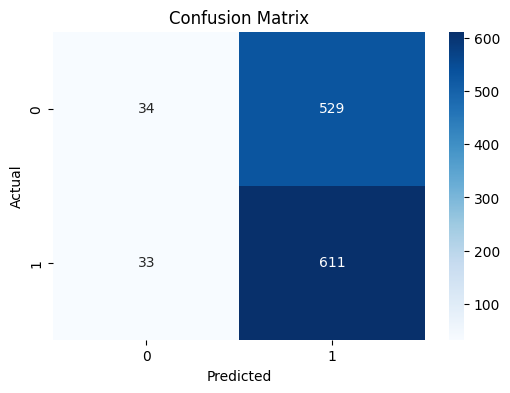

In [193]:
# evaluate optimized model
print('Accuracy:',accuracy_score(y_test, y_pred_tree_new))
print( 'F1 Score:', f1_score(y_test,y_pred_tree_new))
print( 'ROC_AUC_Score:',roc_auc_score(y_test, y_pred_tree_new))
print( 'Precision Score',precision_score(y_test,y_pred_tree_new))
print('Recall score:',recall_score(y_test,y_pred_tree_new))

# create confusion matrix
cmhyp_tree = confusion_matrix(y_test, y_pred_tree_new)

# visualize confusion matrix for decision tree
plt.figure(figsize=(6,4))
sns.heatmap(cmhyp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Conclusion** - Comparing The Model performances

In [194]:
# check baseline model's accuracy score
print('BASELINE LOGISTIC REGRESSION MODEL')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test,y_pred)
print('F1 Score', f1)
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score:', roc_auc)
precision = precision_score(y_test,y_pred)
print('Precision Score', precision)
recall = recall_score(y_test,y_pred)
print('recall score:', recall)
print(cm)
print('************************************')
# logistic regression model - hyperparameter tuned
print('Hypertuned Logistic Regression Model')
print('Accuracy:',accuracy_score(y_test, y_pred_new))
print( 'F1 Score:', f1_score(y_test,y_pred_new))
print( 'ROC_AUC_Score:',roc_auc_score(y_test, y_pred_new))
print( 'Precision Score',precision_score(y_test,y_pred_new))
print('Recall score:',recall_score(y_test,y_pred_new))
print(cmhyp)
print('************************************')
# Decision Tree model - hyperparameter tuned
print('Hypertuned Decision Tree Model')
print('Accuracy:',accuracy_score(y_test, y_pred_tree_new))
print( 'F1 Score:', f1_score(y_test,y_pred_tree_new))
print( 'ROC_AUC_Score:',roc_auc_score(y_test, y_pred_tree_new))
print( 'Precision Score',precision_score(y_test,y_pred_tree_new))
print('Recall score:',recall_score(y_test,y_pred_tree_new))
print(cmhyp_tree)

BASELINE LOGISTIC REGRESSION MODEL
Accuracy: 0.536039768019884
F1 Score 0.6864501679731243
ROC AUC Score: 0.5061270589014044
Precision Score 0.5367775831873906
recall score: 0.9518633540372671
[[ 34 529]
 [ 31 613]]
************************************
Hypertuned Logistic Regression Model
Accuracy: 0.5343827671913836
F1 Score: 0.6849775784753364
ROC_AUC_Score: 0.5045742638703485
Precision Score 0.5359649122807018
Recall score: 0.9487577639751553
[[ 34 529]
 [ 33 611]]
************************************
Hypertuned Decision Tree Model
Accuracy: 0.5352112676056338
F1 Score: 0.689196675900277
ROC_AUC_Score: 0.5042336418697527
Precision Score 0.5357450473729544
Recall score: 0.9658385093167702
[[ 24 539]
 [ 22 622]]


**Efforts to optimize our model seem futile so far, other options would be exploring other models and feature engineering.**

****
**For now we stick with the Decision Tree model which perfoms better than random guessing and significantly better in recall and F1 score.**
****